# Decoupe image non normalisée

Ce fichier permet de decouper en petite images les grilles qui ne sont pas issu des feuilles de marquages.

In [79]:
import easyocr
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import json
from pathlib import Path

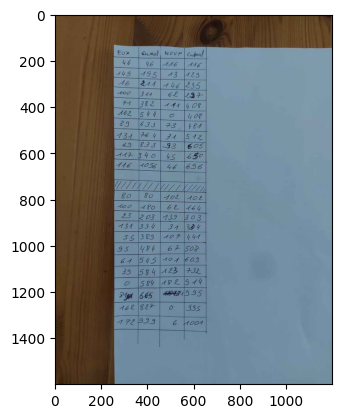

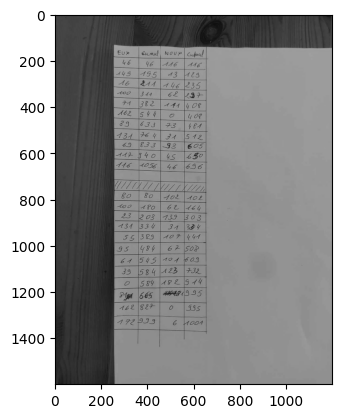

In [80]:
path = ".\\data\\parties\\25_08_2024\\partie_25_08_2024.jpg"
rognement = (150, 250, 1350, 650)

image = cv2.imread(path)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Afficher l'image avec les bounding boxes
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.show()

Rogne l"image à la main

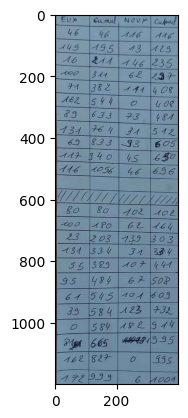

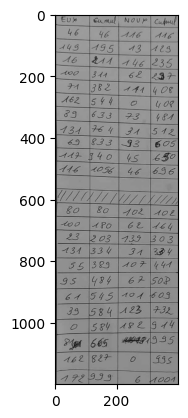

(1200, 400, 3)


True

In [81]:
# Rogner l'image
cropped_image = image[rognement[0]:rognement[2], rognement[1]:rognement[3]]
cropped_gray = gray[rognement[0]:rognement[2], rognement[1]:rognement[3]]

# Afficher l'image rognée en couleur
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.show()

# Afficher l'image rognée en niveaux de gris
plt.imshow(cv2.cvtColor(cropped_gray, cv2.COLOR_BGR2RGB))
plt.show()

# Afficher la taille de l'image rognée
print(cropped_image.shape)

# Enregistre l'image rognée
path_rognee = path.replace(".jpg", "_rognee.jpg")
cv2.imwrite(path_rognee, cropped_image)

In [82]:
# 26 ligne pour 1200 pixels soit donc 46 pixeles la ligne
# 4 collones pour 400 pixels soit donc 100 pixels la collone

espace_x = 40
espace_y = 100

root_dir = Path(path).parent
cases_dir = root_dir / "cases"

if not cases_dir.exists():
    cases_dir.mkdir(parents=True, exist_ok=True)

for j in range(0, 4):
    for i in range(0, 30):
        cases = cropped_image[i*espace_x:(i+1)*espace_x, j*espace_y:(j+1)*espace_y]
        path_line = cases_dir / f"cases_{i}_{j}.jpg"
        cv2.imwrite(path_line, cases)
        #plt.imshow(cv2.cvtColor(line, cv2.COLOR_BGR2RGB))
        #plt.show()
